In [1]:
!pip install tensorflow==2.18.0 random2==1.0.2 matplotlib==3.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [3]:
!unzip "/content/drive/MyDrive/data_5.zip" -d "/content/data_extracted"


Streaming output truncated to the last 5000 lines.
  inflating: /content/data_extracted/train/cup_cakes/2214924.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2217666.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2219167.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2235007.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2235339.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2240918.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2242125.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2243680.jpg  
  inflating: /content/data_extracted/train/cup_cakes/225447.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2267298.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2284357.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2288743.jpg  
  inflating: /content/data_extracted/train/cup_cakes/229074.jpg  
  inflating: /content/data_extracted/train/cup_cakes/2293574.jpg  
  inflating: 

In [8]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

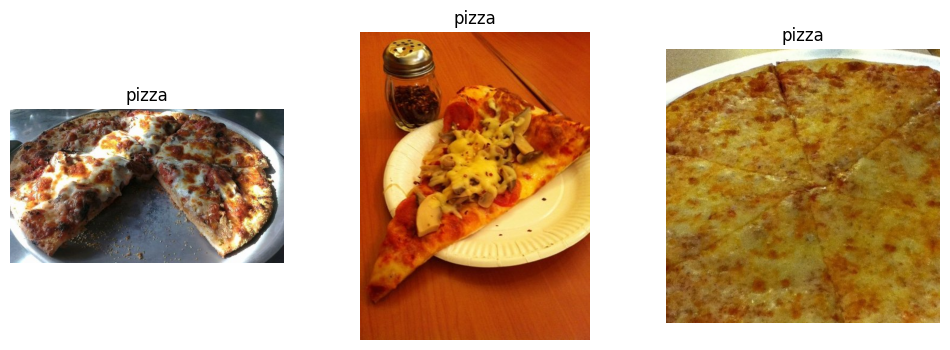

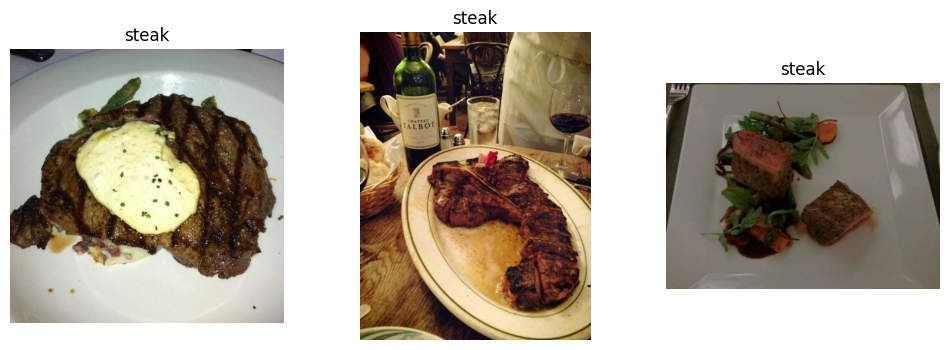

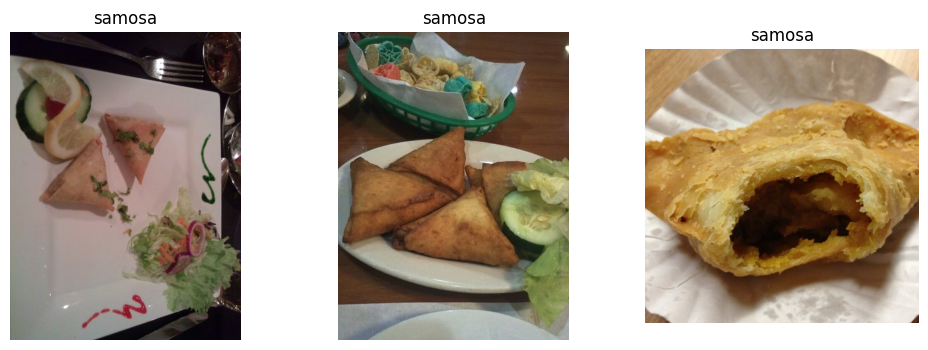

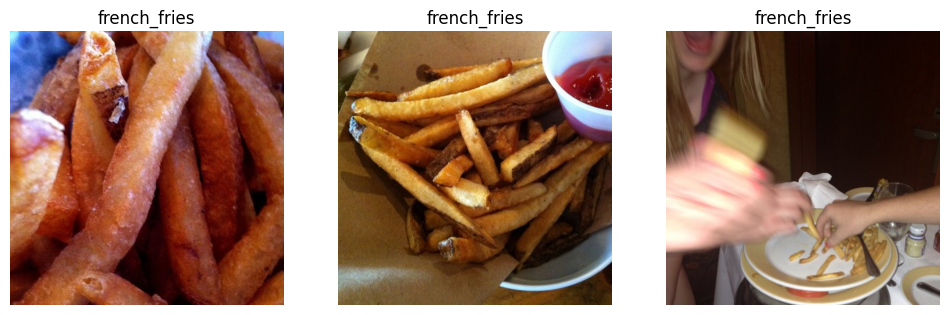

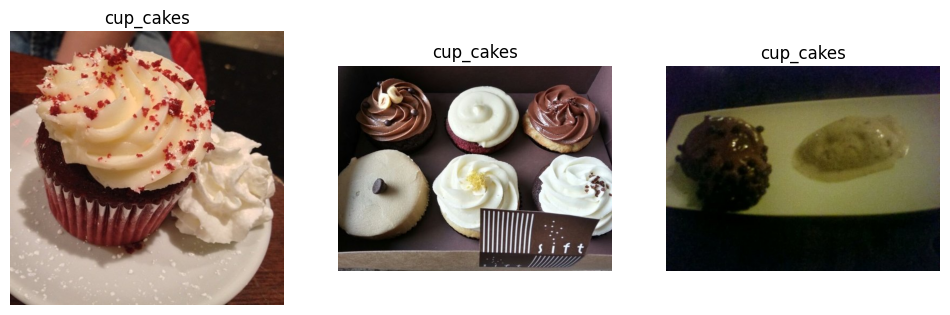

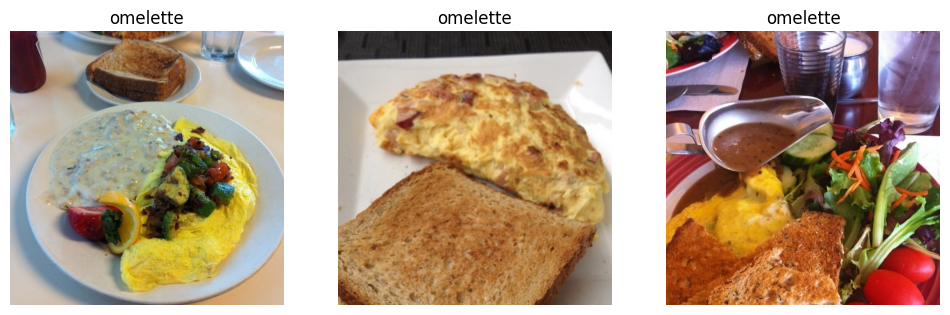

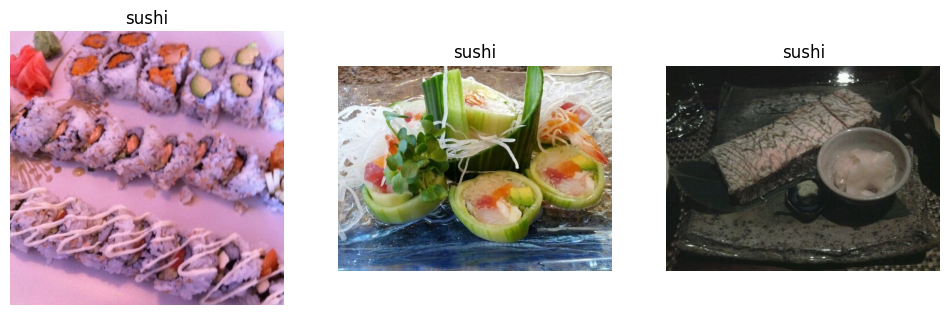

In [10]:

data = "/content/data_extracted/train"


classes = os.listdir(data)


num_images = 3

for class_name in classes:
    class_path = os.path.join(data, class_name)

    if os.path.isdir(class_path):

        image_names = os.listdir(class_path)


        num_to_show = min(num_images, len(image_names))


        random_images = random.sample(image_names, num_to_show)


        plt.figure(figsize=(12, 4))

        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)


            img = mpimg.imread(img_path)


            plt.subplot(1, num_to_show, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)

        plt.show()

In [11]:
for class_name in os.listdir(data):
    class_path = os.path.join(data, class_name)


    if os.path.isdir(class_path):

        image_files = os.listdir(class_path)


        print(f"Class: {class_name} - Number of images: {len(image_files)}")

Class: pizza - Number of images: 750
Class: steak - Number of images: 750
Class: samosa - Number of images: 750
Class: french_fries - Number of images: 750
Class: cup_cakes - Number of images: 750
Class: omelette - Number of images: 750
Class: sushi - Number of images: 750


In [34]:

train_datagen = ImageDataGenerator(
                                     rotation_range=20,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip = True,
                                     rescale = 1./255)


test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    "/content/data_extracted/train",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_data = test_datagen.flow_from_directory(
    "/content/data_extracted/test",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5250 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.


In [35]:
tf.random.set_seed(42)


base_model = tf.keras.applications.InceptionResNetV2(
    input_shape=(299, 299, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.summary()

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (None, 8, 8, 1536)          │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │          49,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,397,255 (207.51 MB)

 Trainable params: 60,519 (236.40 KB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy, so stopping training!")
            self.model.stop_training = True

callbacks = myCallback()

In [37]:


model.compile(
    optimizer=Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

In [38]:
history = model.fit(
    train_data,
    epochs=15,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data),
    callbacks=[callbacks]
)

Epoch 1/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.5366 - loss: 1.2651 - precision: 0.7632 - recall: 0.3201 - val_accuracy: 0.8657 - val_loss: 0.3711 - val_precision: 0.9031 - val_recall: 0.8411
Epoch 2/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 203s 956ms/step - accuracy: 0.8064 - loss: 0.5417 - precision: 0.8584 - recall: 0.7661 - val_accuracy: 0.8869 - val_loss: 0.3175 - val_precision: 0.9090 - val_recall: 0.8680
Epoch 3/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 201s 949ms/step - accuracy: 0.8453 - loss: 0.4494 - precision: 0.8882 - recall: 0.8148 - val_accuracy: 0.9069 - val_loss: 0.2652 - val_precision: 0.9259 - val_recall: 0.8920
Epoch 4/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 157s 952ms/step - accuracy: 0.8601 - loss: 0.4363 - precision: 0.9008 - recall: 0.8247 - val_accuracy: 0.9171 - val_loss: 0.2461 - val_precision: 0.9345 - val_recall: 0.8966
Epoch 5/15
165/165 ━━━━━━━━━━━━━━━━━━━━ 202s 952ms/step - accuracy: 0.8648 - loss: 0.4009 - precision: 0.8989 - recall: 0.8389 - val_accuracy: 0.91

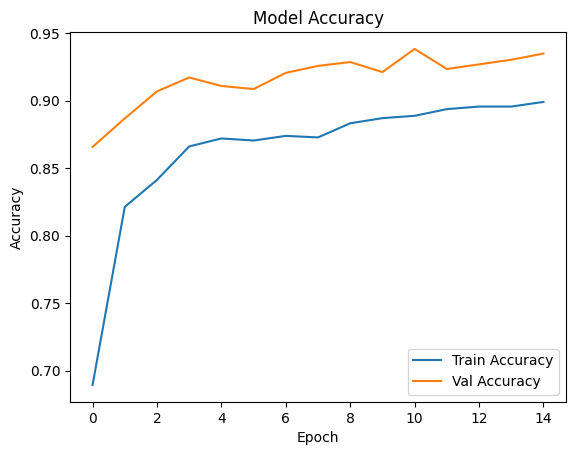

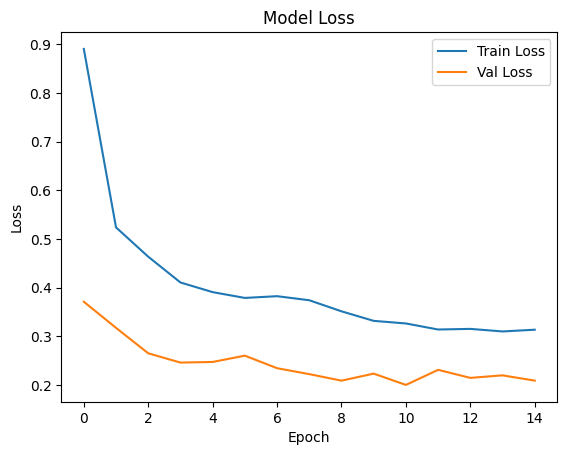

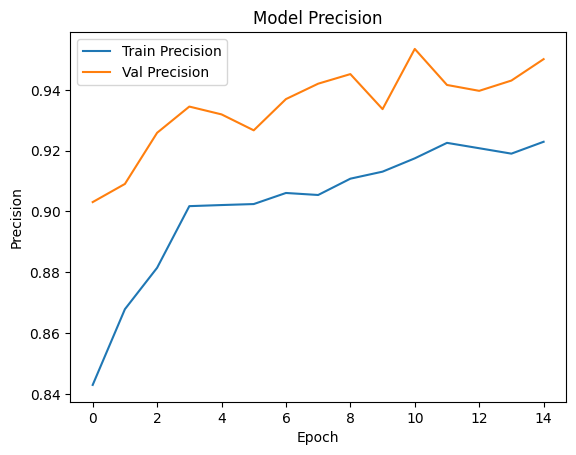

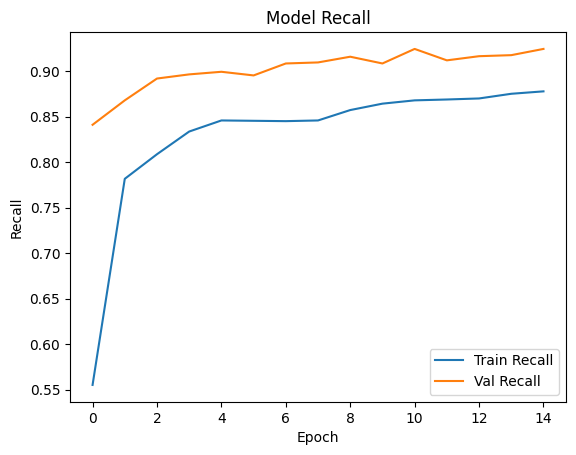

In [39]:

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training & Validation Precision
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Val Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot Training & Validation Recall
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [40]:
model.save('model.h5')

In [41]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>